In [16]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.1.0 


## Importing Images

Let's now import an image.

It's common for a lot of algorithms implemented in OpenCV to act on a black and white version of the image, so we'll also transform the image to B&W. Here is the image we are going to import:

![](.../images/apple4.jpg)

In [18]:
# load our image and convert it to grayscale
image = cv2.imread("../images/apple4.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Images as Data Structures

Let's now see what the imported image looks like:

In [19]:
print("\nData Type:"); pprint(type(image))
print("\nExample:\n pixel at (0,0) [B,G,R]:\t[%i,%i,%i]" % tuple(image[0,0,:]))
print("\ndata-type:\n %s " % image.dtype)
print("\nImage shape: "); print("Height:\t\t%i pixels\nWidth:\t\t%i pixels\nChannels:\t%i" % image.shape)
print("\nThe image array:"); pprint(image)


Data Type:
<class 'numpy.ndarray'>

Example:
 pixel at (0,0) [B,G,R]:	[255,255,255]

data-type:
 uint8 

Image shape: 
Height:		100 pixels
Width:		100 pixels
Channels:	3

The image array:
array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],


## Plotting Images

Before we move further, let's make sure that we can again transform this matrix into an image and print it. OpenCV's own function doesn't play very nice with other IDEs (for example Commit.Live or Jupyter notebooks, so we are going to use matplotlib to plot these images.

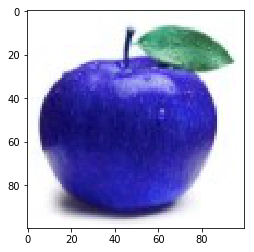

In [20]:
plt.imshow(image)
plt.show()

## Fix the plot: by manipulating the colorspace

The colors are off!

* The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR.
* Matplotlib's plot expects an RGB image.
* So, for a correct display of the image, it is necessary to swap those channels.

`cvtColor` is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

In [21]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
pprint(BGRflags)

['COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLOR_BGR2HLS_FULL',
 'COLOR_BGR2HSV',
 'COLOR_BGR2HSV_FULL',
 'COLOR_BGR2LAB',
 'COLOR_BGR2LUV',
 'COLOR_BGR2Lab',
 'COLOR_BGR2Luv',
 'COLOR_BGR2RGB',
 'COLOR_BGR2RGBA',
 'COLOR_BGR2XYZ',
 'COLOR_BGR2YCR_CB',
 'COLOR_BGR2YCrCb',
 'COLOR_BGR2YUV',
 'COLOR_BGR2YUV_I420',
 'COLOR_BGR2YUV_IYUV',
 'COLOR_BGR2YUV_YV12',
 'COLOR_BGR5552BGR',
 'COLOR_BGR5552BGRA',
 'COLOR_BGR5552GRAY',
 'COLOR_BGR5552RGB',
 'COLOR_BGR5552RGBA',
 'COLOR_BGR5652BGR',
 'COLOR_BGR5652BGRA',
 'COLOR_BGR5652GRAY',
 'COLOR_BGR5652RGB',
 'COLOR_BGR5652RGBA',
 'COLOR_BGRA2BGR',
 'COLOR_BGRA2BGR555',
 'COLOR_BGRA2BGR565',
 'COLOR_BGRA2GRAY',
 'COLOR_BGRA2RGB',
 'COLOR_BGRA2RGBA',
 'COLOR_BGRA2YUV_I420',
 'COLOR_BGRA2YUV_IYUV',
 'COLOR_BGRA2YUV_YV12']


In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is `cv2.COLOR_BGR2RGB`

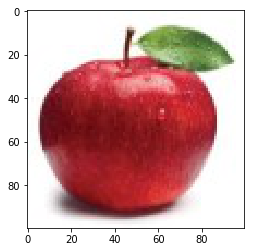

In [22]:
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()

## A function to plot images

Let's wrap everything inside a function so that we can easily use it later on.

In [23]:
def plotBGR2RGB(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

## Implementing a simple k-NN system

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

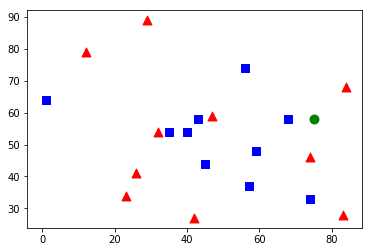

In [2]:
# Generate 20 known data points with random (x,y) values to train the model
trainData = np.random.randint(0,100,(20,2)).astype(np.float32)

# Labels each data point with numbers 0 and 1 randomly 
labels = np.random.randint(0,2,(20,1)).astype(np.float32)

# When label = 0 show as red traingle
red = trainData[labels.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

# When label = 1 show as blue square
blue = trainData[labels.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

# New unknown data point shown as green circle
test = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(test[:,0],test[:,1],80,'g','o')
plt.show()

In [3]:
# Implement k-NN to find classification of unknown green data point
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, labels)
ret, results, neighbours ,dist = knn.findNearest(test, 3)

# Print out some results
print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )

result:  [[0.]]

neighbours:  [[1. 0. 0.]]

distance:  [[ 49. 145. 181.]]



## Image Classification using k-NN

In [4]:
# Import the images
img1 = cv2.imread('../images/apple1.jpg',0)
img2 = cv2.imread('../images//apple2.jpg',0)
img3 = cv2.imread('../images//apple3.jpg',0)

img4 = cv2.imread('../images/banana1.jpg',0)
img5 = cv2.imread('../images/banana2.jpg',0)
img6 = cv2.imread('../images/banana3.jpg',0)

test = cv2.imread('../images/banana4.jpg',0)

In [5]:
# Combine the images into one array
train = np.concatenate((img1, img2, img3, img4, img5, img6), axis=0)

# Prepare train and test datasets
train = train.reshape(-1,10000).astype(np.float32)
test = test.reshape(-1,10000).astype(np.float32)

In [6]:
# Show to shape of the train and test data for further understanding
test.shape

(1, 10000)

In [7]:
# Create labels for train and test data. Apple = 0 , Banana = 1.
train_labels = np.array([[0],[0],[0],[1],[1],[1]]).astype(np.float32)

In [8]:
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=1)

In [9]:
# Print out result of classification
if result == 0:
    print('I guess this is an apple!')
elif result == 1:
    print('I guess this is a banana!')     

I guess this is a banana!


## Image Classification using k-NN (MNIST dataset)

In [10]:
# Import the image
img = cv2.imread('../images/digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Show the image to visualize
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

In [12]:
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

In [13]:
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=1)

In [14]:
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

92.0


## Image Classification using k-NN (fashion dataset)

In [15]:
# Import the image
img_fashion = cv2.imread('../images/fashion.png')
fashion_gray = cv2.cvtColor(img_fashion,cv2.COLOR_BGR2GRAY)

# Show the image to visualize

# Now we split the image to 900 cells, each 28x28 size
cells = [np.hsplit(row,30) for row in np.vsplit(fashion_gray,30)]

# Make it into a Numpy array. It size will be (30,30,28,28)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,0:25].reshape(-1,784).astype(np.float32) # Size = (450,784)
test = x[:,25:30].reshape(-1,784).astype(np.float32) # Size = (450,784)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,75)[:,np.newaxis]
test_labels = np.repeat(k,15)[:,np.newaxis]
#test_labels = train_labels.copy()

# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=1)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

76.66666666666667
